**Predicting the Estimated Time of Arrival for Bikes in Nairobi**

March 2020

**OVERVIEW**

Despite the continent offering tremendous opportunities, one of the biggest challenges is logistics. The complexity of this problem is because of the unique market and volatile economic drivers. 
Sendy, in partnership with insight2impact, is hosting a challenge on Zindi to predict the estimated time of delivery of orders, from the point of driver pickup to the point of arrival at the final destination. 
For this project, a training dataset from a subset of about 20,000 orders with bikes (“boda-boda”) in Nairobi is provided. This data is also anonymized. There’s also an additional GIS dataset that can be leveraged for this project. The description and link to this dataset can be seen here: Sendy Logistics Challenge
For this project, we’re presented with the training set (with labels ETA), the test set, riders description and definitions of the variables. The data is anonymized to preserve sensitive information. 


In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
rider = pd.read_csv('Riders.csv')
train = pd.read_csv('Train.csv')

In [33]:
rider.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


In [34]:
train.head(2)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993


In [35]:
rider.shape

(960, 5)

In [36]:
train.shape

(21201, 29)

In [37]:
train['Rider Id'].value_counts()

Rider_Id_726    247
Rider_Id_576    223
Rider_Id_523    199
Rider_Id_101    183
Rider_Id_205    182
               ... 
Rider_Id_719      1
Rider_Id_371      1
Rider_Id_601      1
Rider_Id_417      1
Rider_Id_794      1
Name: Rider Id, Length: 924, dtype: int64

In [38]:
#joining the train and rider dataframe
df = train.merge(rider, on='Rider Id', how='outer')
df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,Bike,3.0,Business,9.0,5.0,9:35:46 AM,9.0,5.0,...,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745.0,1637,1309,13.8,549
1,Order_No_27440,User_Id_2642,Bike,3.0,Personal,18.0,5.0,3:41:17 PM,18.0,5.0,...,-1.326774,36.787807,-1.356237,36.904295,Rider_Id_432,2886.0,1637,1309,13.8,549
2,Order_No_14170,User_Id_3339,Bike,3.0,Business,31.0,5.0,12:51:41 PM,31.0,5.0,...,-1.255189,36.782203,-1.273412,36.818206,Rider_Id_432,2615.0,1637,1309,13.8,549
3,Order_No_21727,User_Id_3523,Bike,3.0,Personal,2.0,2.0,7:12:10 AM,2.0,2.0,...,-1.290315,36.757377,-1.223520,36.802061,Rider_Id_432,2986.0,1637,1309,13.8,549
4,Order_No_8301,User_Id_87,Bike,2.0,Personal,22.0,2.0,10:40:58 AM,22.0,2.0,...,-1.273524,36.799220,-1.300431,36.752427,Rider_Id_432,1602.0,1637,1309,13.8,549


In [39]:
df.shape

(21237, 33)

In [40]:
df.dtypes

Order No                                      object
User Id                                       object
Vehicle Type                                  object
Platform Type                                float64
Personal or Business                          object
Placement - Day of Month                     float64
Placement - Weekday (Mo = 1)                 float64
Placement - Time                              object
Confirmation - Day of Month                  float64
Confirmation - Weekday (Mo = 1)              float64
Confirmation - Time                           object
Arrival at Pickup - Day of Month             float64
Arrival at Pickup - Weekday (Mo = 1)         float64
Arrival at Pickup - Time                      object
Pickup - Day of Month                        float64
Pickup - Weekday (Mo = 1)                    float64
Pickup - Time                                 object
Arrival at Destination - Day of Month        float64
Arrival at Destination - Weekday (Mo = 1)    f

In [41]:
#displaying the percentage of null values
df.isna().mean()*100

Order No                                      0.169515
User Id                                       0.169515
Vehicle Type                                  0.169515
Platform Type                                 0.169515
Personal or Business                          0.169515
Placement - Day of Month                      0.169515
Placement - Weekday (Mo = 1)                  0.169515
Placement - Time                              0.169515
Confirmation - Day of Month                   0.169515
Confirmation - Weekday (Mo = 1)               0.169515
Confirmation - Time                           0.169515
Arrival at Pickup - Day of Month              0.169515
Arrival at Pickup - Weekday (Mo = 1)          0.169515
Arrival at Pickup - Time                      0.169515
Pickup - Day of Month                         0.169515
Pickup - Weekday (Mo = 1)                     0.169515
Pickup - Time                                 0.169515
Arrival at Destination - Day of Month         0.169515
Arrival at

In [42]:
df.head(2)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,Bike,3.0,Business,9.0,5.0,9:35:46 AM,9.0,5.0,...,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745.0,1637,1309,13.8,549
1,Order_No_27440,User_Id_2642,Bike,3.0,Personal,18.0,5.0,3:41:17 PM,18.0,5.0,...,-1.326774,36.787807,-1.356237,36.904295,Rider_Id_432,2886.0,1637,1309,13.8,549


In [43]:
df.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,...,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,...,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21237.000000,21237.000000,21237.000000,21237.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,...,7.905797,-1.281470,36.811264,-1.282581,36.811220,1556.920947,1692.883552,985.798795,13.879898,341.301549
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,...,17.089971,0.030507,0.037473,0.034824,0.044721,987.270788,1574.987186,647.775503,0.935761,403.134360
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000,2.000000,96.000000,0.000000,0.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,...,1.075000,-1.300921,36.784605,-1.301201,36.785661,882.000000,557.000000,495.000000,13.600000,61.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,...,2.900000,-1.279395,36.807040,-1.284382,36.808002,1369.000000,1212.000000,872.000000,14.000000,161.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,...,4.900000,-1.257147,36.829741,-1.261177,36.829477,2040.000000,2311.000000,1236.000000,14.300000,495.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,...,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000,9756.000000,3764.000000,15.200000,2298.000000


In [44]:
#fill all nun values with the average temperature
temp_mean = df['Temperature'].mean()
df['Temperature'] = df['Temperature'].fillna(value=temp_mean)

In [45]:
df['Confirmation - Weekday (Mo = 1)'].unique()

array([ 5.,  2.,  3.,  1.,  4.,  6.,  7., nan])

In [46]:
df['Rider Id'].value_counts()

Rider_Id_726    247
Rider_Id_576    223
Rider_Id_523    199
Rider_Id_101    183
Rider_Id_205    182
               ... 
Rider_Id_165      1
Rider_Id_29       1
Rider_Id_371      1
Rider_Id_601      1
Rider_Id_794      1
Name: Rider Id, Length: 960, dtype: int64

(array([1703., 3066., 2641., 2646., 3833., 1681., 1197.,  817.,  437.,
         672.,  765.,  687.,  557.,  131.,  116.,   94.,   60.,  105.,
           4.,   25.]),
 array([  96. ,  279.4,  462.8,  646.2,  829.6, 1013. , 1196.4, 1379.8,
        1563.2, 1746.6, 1930. , 2113.4, 2296.8, 2480.2, 2663.6, 2847. ,
        3030.4, 3213.8, 3397.2, 3580.6, 3764. ]),
 <a list of 20 Patch objects>)

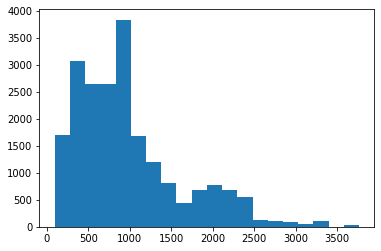

In [47]:
plt.hist(df['Age'], bins=20)

In [48]:
#display all numerical or continous values
numeric = df._get_numeric_data()
numeric.head()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,...,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,3.0,9.0,5.0,9.0,5.0,9.0,5.0,9.0,5.0,9.0,...,NaN,-1.317755,36.830370,-1.300406,36.829741,745.0,1637,1309,13.8,549
1,3.0,18.0,5.0,18.0,5.0,18.0,5.0,18.0,5.0,18.0,...,NaN,-1.326774,36.787807,-1.356237,36.904295,2886.0,1637,1309,13.8,549
2,3.0,31.0,5.0,31.0,5.0,31.0,5.0,31.0,5.0,31.0,...,NaN,-1.255189,36.782203,-1.273412,36.818206,2615.0,1637,1309,13.8,549
3,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,-1.290315,36.757377,-1.223520,36.802061,2986.0,1637,1309,13.8,549
4,2.0,22.0,2.0,22.0,2.0,22.0,2.0,22.0,2.0,22.0,...,NaN,-1.273524,36.799220,-1.300431,36.752427,1602.0,1637,1309,13.8,549


In [49]:
numeric.corr()['Time from Pickup to Arrival'].sort_values()

Destination Lat                             -0.061872
Pickup Lat                                  -0.053823
Average_Rating                              -0.042559
No_Of_Orders                                -0.041608
Placement - Day of Month                    -0.014710
Confirmation - Day of Month                 -0.014701
Arrival at Pickup - Day of Month            -0.014701
Pickup - Day of Month                       -0.014701
Arrival at Destination - Day of Month       -0.014701
Age                                         -0.007969
Platform Type                               -0.003827
No_of_Ratings                                0.005609
Temperature                                  0.005772
Placement - Weekday (Mo = 1)                 0.009693
Pickup - Weekday (Mo = 1)                    0.009744
Arrival at Pickup - Weekday (Mo = 1)         0.009744
Confirmation - Weekday (Mo = 1)              0.009744
Arrival at Destination - Weekday (Mo = 1)    0.009744
Precipitation in millimeters

(array([1.000e+00, 3.400e+01, 2.240e+02, 3.670e+02, 7.760e+02, 1.555e+03,
        1.697e+03, 2.070e+03, 6.584e+03, 2.413e+03, 2.061e+03, 1.877e+03,
        9.950e+02, 4.030e+02, 1.800e+02]),
 array([11.2       , 12.59333333, 13.98666667, 15.38      , 16.77333333,
        18.16666667, 19.56      , 20.95333333, 22.34666667, 23.74      ,
        25.13333333, 26.52666667, 27.92      , 29.31333333, 30.70666667,
        32.1       ]),
 <a list of 15 Patch objects>)

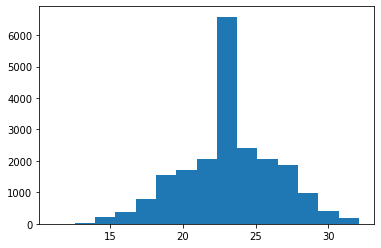

In [50]:
plt.hist(df['Temperature'], bins=15)

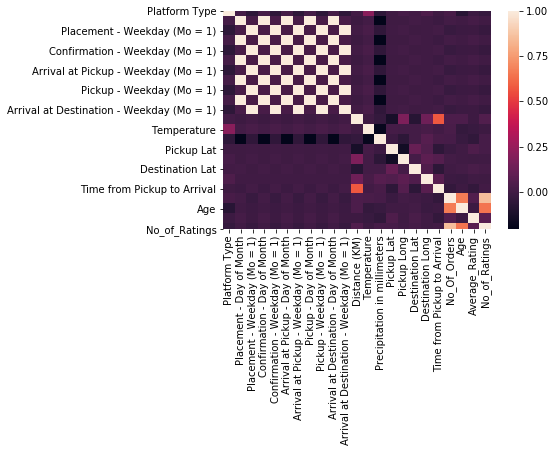

In [51]:
#visualizing the correlation between the numeric values
plt.figsize=(16,8)
sns.heatmap(numeric.corr(), annot=False)

In [52]:
df.head(1)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,Bike,3.0,Business,9.0,5.0,9:35:46 AM,9.0,5.0,...,-1.317755,36.83037,-1.300406,36.829741,Rider_Id_432,745.0,1637,1309,13.8,549


In [53]:
df.groupby('Rider Id', as_index=False).agg({'Time from Pickup to Arrival': 'mean','Distance (KM)':'mean'})

,Rider Id,Time from Pickup to Arrival,Distance (KM)
0,Rider_Id_0,1393.000000,12.000000
1,Rider_Id_1,1333.000000,11.000000
2,Rider_Id_10,529.098039,9.490196
3,Rider_Id_100,1271.929293,8.171717
4,Rider_Id_101,1755.579235,10.491803
...,...,...,...
955,Rider_Id_959,1556.086957,8.956522
956,Rider_Id_96,1485.163462,9.817308
957,Rider_Id_97,965.857143,10.571429
958,Rider_Id_98,1371.000000,10.000000


The scatter plot below shows that placement and delivery of order was made on the same day

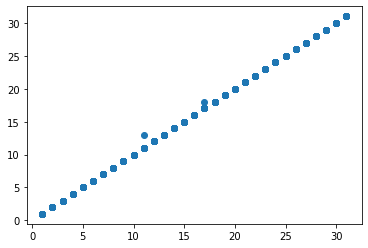

In [54]:
plt.scatter(df['Placement - Day of Month'], df['Arrival at Destination - Day of Month'])

In [55]:
numeric.head(2)

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,...,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,3.0,9.0,5.0,9.0,5.0,9.0,5.0,9.0,5.0,9.0,...,NaN,-1.317755,36.830370,-1.300406,36.829741,745.0,1637,1309,13.8,549
1,3.0,18.0,5.0,18.0,5.0,18.0,5.0,18.0,5.0,18.0,...,NaN,-1.326774,36.787807,-1.356237,36.904295,2886.0,1637,1309,13.8,549


In [58]:
#
dist = df[['Pickup Lat', 'Pickup Long' , 'Destination Lat','Destination Long']]
dist.head()

,Pickup Lat,Pickup Long,Destination Lat,Destination Long
0,-1.317755,36.830370,-1.300406,36.829741
1,-1.326774,36.787807,-1.356237,36.904295
2,-1.255189,36.782203,-1.273412,36.818206
3,-1.290315,36.757377,-1.223520,36.802061
4,-1.273524,36.799220,-1.300431,36.752427


In [68]:
#calculatng the distance between place of pickup and delivery destination using the latitude and longtitude
#Using the haversine formula

earth_radius = 6371
to_radians = True

if to_radians:
    a = np.sin((dist['Destination Lat'] - dist['Pickup Lat'])/2.0)**2 + \
    np.cos(dist['Pickup Lat']) * np.cos(dist['Destination Lat']) * np.sin((dist['Destination Long'] - dist['Pickup Lat'])/2.0)**2
     
dist['cal_distance (M)'] = earth_radius * 2 * np.arcsin(np.sqrt(a))
#"cal_distance" is measured in metres

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [76]:
dist.head()

,Pickup Lat,Pickup Long,Destination Lat,Destination Long,cal_distance (M)
0,-1.317755,36.830370,-1.300406,36.829741,741.247000
1,-1.326774,36.787807,-1.356237,36.904295,782.986509
2,-1.255189,36.782203,-1.273412,36.818206,724.704410
3,-1.290315,36.757377,-1.223520,36.802061,875.246593
4,-1.273524,36.799220,-1.300431,36.752427,604.865492


In [67]:
df[['Distance (KM)']].head()

,Distance (KM)
0,4.0
1,20.0
2,6.0
3,18.0
4,7.0


In [118]:
numeric['Distance (M)'] = dist['cal_distance (M)']

In [119]:
df['Personal or Business'].unique()

array(['Business', 'Personal', nan], dtype=object)

In [120]:
#encoding norminal values to continous values
dummies = pd.get_dummies(df['Personal or Business'])
dummies.head(2)

,Business,Personal
0,1,0
1,0,1


In [121]:
#Personal column was dropped
numeric['Business/Personal'] = dummies.drop('Personal', axis=1)

In [122]:
dummies.shape

(21237, 2)

In [123]:
numeric.dtypes

Platform Type                                float64
Placement - Day of Month                     float64
Placement - Weekday (Mo = 1)                 float64
Confirmation - Day of Month                  float64
Confirmation - Weekday (Mo = 1)              float64
Arrival at Pickup - Day of Month             float64
Arrival at Pickup - Weekday (Mo = 1)         float64
Pickup - Day of Month                        float64
Pickup - Weekday (Mo = 1)                    float64
Arrival at Destination - Day of Month        float64
Arrival at Destination - Weekday (Mo = 1)    float64
Distance (KM)                                float64
Temperature                                  float64
Precipitation in millimeters                 float64
Pickup Lat                                   float64
Pickup Long                                  float64
Destination Lat                              float64
Destination Long                             float64
Time from Pickup to Arrival                  f

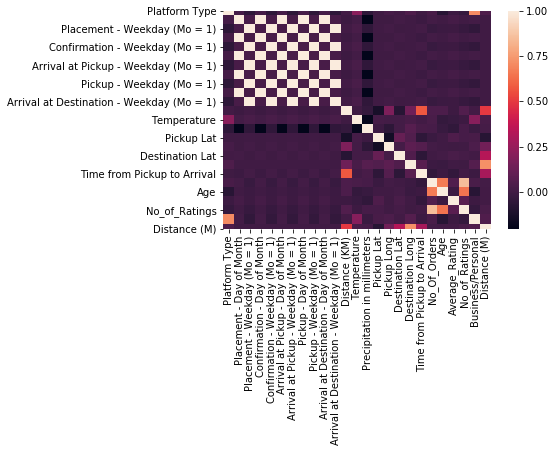

In [152]:
sns.heatmap(numeric.corr(), annot=False)

In [154]:
numeric.corr()['Time from Pickup to Arrival'].sort_values()

Destination Lat                             -0.061872
Pickup Lat                                  -0.053823
Average_Rating                              -0.042559
No_Of_Orders                                -0.041608
Placement - Day of Month                    -0.014710
Confirmation - Day of Month                 -0.014701
Arrival at Pickup - Day of Month            -0.014701
Pickup - Day of Month                       -0.014701
Arrival at Destination - Day of Month       -0.014701
Business/Personal                           -0.013354
Age                                         -0.007969
Platform Type                               -0.003827
No_of_Ratings                                0.005609
Temperature                                  0.005772
Placement - Weekday (Mo = 1)                 0.009693
Arrival at Destination - Weekday (Mo = 1)    0.009744
Pickup - Weekday (Mo = 1)                    0.009744
Arrival at Pickup - Weekday (Mo = 1)         0.009744
Confirmation - Weekday (Mo =

In [165]:
#dropping null values in numeric DataFrame
numeric = numeric.drop('Precipitation in millimeters', axis=1)
numeric = numeric.dropna(axis=0)

In [196]:
#Assigning X and y variables ie. Target variable and features
X = numeric[['Distance (KM)','Distance (M)','Confirmation - Weekday (Mo = 1)','Placement - Weekday (Mo = 1)','Temperature','No_of_Ratings','Age','Business/Personal','Arrival at Pickup - Weekday (Mo = 1)','Pickup Long','Destination Long']]
y = numeric[['Time from Pickup to Arrival']]

In [197]:
from sklearn.model_selection import train_test_split

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [211]:
from sklearn.linear_model import LinearRegression

In [212]:
model = LinearRegression()

In [213]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [214]:
y_predict = model.predict(X_test)

In [215]:
model.score(X_train,y_train)

0.3379205016542681